In [15]:
import yfinance as yf
import pandas as pd

# Define the Nifty50 ticker symbol and the date range
ticker_symbol = '^NSEI'
start_date = '2014-01-01'
end_date = '2025-12-09'

# Fetch historical data
nifty_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
print("First 5 rows of Nifty50 historical data:")
print(nifty_data.head())

# Display information about the DataFrame
print("\nInformation about Nifty50 historical data:")
nifty_data.info()

/tmp/ipython-input-4203375947.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty_data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

First 5 rows of Nifty50 historical data:
Price             Close         High          Low         Open  Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI
Date                                                                  
2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100
2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000
2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300
2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600
2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900

Information about Nifty50 historical data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2932 entries, 2014-01-02 to 2025-12-08
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^NSEI)   2932 non-null   float64
 1   (High, ^NSEI)    2932 non-null   float64
 2   (Low, ^NSEI)     2932 non-null   f

In [16]:
nifty_data.columns = nifty_data.columns.droplevel(1)
nifty_data = nifty_data.rename_axis(None, axis=1)

# Confirming Date is the index and display first few rows with new columns
print("First 5 rows of Nifty50 historical data with cleaned columns:")
print(nifty_data.head())

print("\nInformation about Nifty50 historical data after column cleaning:")
nifty_data.info()

First 5 rows of Nifty50 historical data with cleaned columns:
                  Close         High          Low         Open  Volume
Date                                                                  
2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100
2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000
2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300
2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600
2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900

Information about Nifty50 historical data after column cleaning:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2932 entries, 2014-01-02 to 2025-12-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2932 non-null   float64
 1   High    2932 non-null   float64
 2   Low     2932 non-null   float64
 3   Open    2932 non-null   float64
 4   Volume  2932 non-null   

In [17]:
import numpy as np

# 1. Calculate Daily Returns
nifty_data['Daily_Return'] = nifty_data['Close'].pct_change() * 100
nifty_data['Daily_Return'].fillna(0, inplace=True)

# 2. Create Lag Features
lag_cols = ['Close', 'Open', 'High', 'Low', 'Volume']
for col in lag_cols:
    for lag in [1, 3, 5, 10]:
        nifty_data[f'{col}_Lag_{lag}'] = nifty_data[col].shift(lag)

# 3. Calculate Simple Moving Averages (SMA)
nifty_data['SMA_7'] = nifty_data['Close'].rolling(window=7).mean()
nifty_data['SMA_30'] = nifty_data['Close'].rolling(window=30).mean()

# 4. Calculate Exponential Moving Averages (EMA)
nifty_data['EMA_7'] = nifty_data['Close'].ewm(span=7, adjust=False).mean()
nifty_data['EMA_30'] = nifty_data['Close'].ewm(span=30, adjust=False).mean()

# 5. Calculate Volatility (14-day rolling standard deviation of Daily_Return)
nifty_data['Volatility_14D'] = nifty_data['Daily_Return'].rolling(window=14).std()

# 6. Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

nifty_data['RSI_14'] = calculate_rsi(nifty_data['Close'], window=14)

# 7. Calculate Moving Average Convergence Divergence (MACD)
exp1 = nifty_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = nifty_data['Close'].ewm(span=26, adjust=False).mean()
nifty_data['MACD'] = exp1 - exp2
nifty_data['Signal_Line'] = nifty_data['MACD'].ewm(span=9, adjust=False).mean()

# 8. Display the first few rows and information of the DataFrame
print("First 5 rows of Nifty50 historical data with engineered features:")
print(nifty_data.head())

print("\nInformation about Nifty50 historical data after feature engineering:")
nifty_data.info()


First 5 rows of Nifty50 historical data with engineered features:
                  Close         High          Low         Open  Volume  \
Date                                                                     
2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100   
2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000   
2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300   
2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600   
2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900   

            Daily_Return  Close_Lag_1  Close_Lag_3  Close_Lag_5  Close_Lag_10  \
Date                                                                            
2014-01-02      0.000000          NaN          NaN          NaN           NaN   
2014-01-03     -0.160742  6221.149902          NaN          NaN           NaN   
2014-01-06     -0.317167  6211.149902          NaN          NaN           NaN   
2014-01-07

/tmp/ipython-input-284160294.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nifty_data['Daily_Return'].fillna(0, inplace=True)


In [18]:
import numpy as np

# 1. Calculate Daily Returns
nifty_data['Daily_Return'] = nifty_data['Close'].pct_change() * 100
nifty_data['Daily_Return'] = nifty_data['Daily_Return'].fillna(0)

# 2. Create Lag Features
lag_cols = ['Close', 'Open', 'High', 'Low', 'Volume']
for col in lag_cols:
    for lag in [1, 3, 5, 10]:
        nifty_data[f'{col}_Lag_{lag}'] = nifty_data[col].shift(lag)

# 3. Calculate Simple Moving Averages (SMA)
nifty_data['SMA_7'] = nifty_data['Close'].rolling(window=7).mean()
nifty_data['SMA_30'] = nifty_data['Close'].rolling(window=30).mean()

# 4. Calculate Exponential Moving Averages (EMA)
nifty_data['EMA_7'] = nifty_data['Close'].ewm(span=7, adjust=False).mean()
nifty_data['EMA_30'] = nifty_data['Close'].ewm(span=30, adjust=False).mean()

# 5. Calculate Volatility (14-day rolling standard deviation of Daily_Return)
nifty_data['Volatility_14D'] = nifty_data['Daily_Return'].rolling(window=14).std()

# 6. Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

nifty_data['RSI_14'] = calculate_rsi(nifty_data['Close'], window=14)

# 7. Calculate Moving Average Convergence Divergence (MACD)
exp1 = nifty_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = nifty_data['Close'].ewm(span=26, adjust=False).mean()
nifty_data['MACD'] = exp1 - exp2
nifty_data['Signal_Line'] = nifty_data['MACD'].ewm(span=9, adjust=False).mean()

# 8. Display the first few rows and information of the DataFrame
print("First 5 rows of Nifty50 historical data with engineered features:")
print(nifty_data.head())

print("\nInformation about Nifty50 historical data after feature engineering:")
nifty_data.info()


First 5 rows of Nifty50 historical data with engineered features:
                  Close         High          Low         Open  Volume  \
Date                                                                     
2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100   
2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000   
2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300   
2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600   
2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900   

            Daily_Return  Close_Lag_1  Close_Lag_3  Close_Lag_5  Close_Lag_10  \
Date                                                                            
2014-01-02      0.000000          NaN          NaN          NaN           NaN   
2014-01-03     -0.160742  6221.149902          NaN          NaN           NaN   
2014-01-06     -0.317167  6211.149902          NaN          NaN           NaN   
2014-01-07

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Remove rows with missing values
nifty_data_processed = nifty_data.dropna()

# 2. Define the target variable (y) and features (X)
# Target is the 'Close' price shifted one day into the future
nifty_data_processed['Target_Close'] = nifty_data_processed['Close'].shift(-1)

# Drop the last row as its Target_Close will be NaN
nifty_data_processed = nifty_data_processed.dropna(subset=['Target_Close'])

y = nifty_data_processed['Target_Close']
X = nifty_data_processed.drop(['Close', 'Target_Close'], axis=1)

# 3. Split the data chronologically into training, validation, and test sets
total_samples = len(X)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.15)
test_size = total_samples - train_size - val_size # Remaining for test

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size : train_size + val_size]
y_val = y.iloc[train_size : train_size + val_size]

X_test = X.iloc[train_size + val_size :]
y_test = y.iloc[train_size + val_size :]

# 4. Initialize and fit MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on X_train and transform all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with original column names and index
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# 5. Display the shapes of the resulting DataFrames/Series
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

/tmp/ipython-input-596023689.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_data_processed['Target_Close'] = nifty_data_processed['Close'].shift(-1)


X_train shape: (2031, 33)
y_train shape: (2031,)
X_val shape: (435, 33)
y_val shape: (435,)
X_test shape: (436, 33)
y_test shape: (436,)


In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Remove rows with missing values
nifty_data_processed = nifty_data.dropna().copy() # Explicitly create a copy

# 2. Define the target variable (y) and features (X)
# Target is the 'Close' price shifted one day into the future
nifty_data_processed['Target_Close'] = nifty_data_processed['Close'].shift(-1)

# Drop the last row as its Target_Close will be NaN
nifty_data_processed = nifty_data_processed.dropna(subset=['Target_Close'])

y = nifty_data_processed['Target_Close']
X = nifty_data_processed.drop(['Close', 'Target_Close'], axis=1)

# 3. Split the data chronologically into training, validation, and test sets
total_samples = len(X)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.15)
test_size = total_samples - train_size - val_size # Remaining for test

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size : train_size + val_size]
y_val = y.iloc[train_size : train_size + val_size]

X_test = X.iloc[train_size + val_size :]
y_test = y.iloc[train_size + val_size :]

# 4. Initialize and fit MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on X_train and transform all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with original column names and index
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# 5. Display the shapes of the resulting DataFrames/Series
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2031, 33)
y_train shape: (2031,)
X_val shape: (435, 33)
y_val shape: (435,)
X_test shape: (436, 33)
y_test shape: (436,)


In [21]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Trains a model, makes predictions, and evaluates its performance."""
    print(f"\nTraining {type(model).__name__}...")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)

    print(f"RMSE for {type(model).__name__}: {rmse:.4f}")
    print(f"MAE for {type(model).__name__}: {mae:.4f}")

    return model, predictions

# 1. XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model, xgb_predictions = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# 2. LightGBM Regressor
lgbm_model = lgb.LGBMRegressor(random_state=42)
lgbm_model, lgbm_predictions = evaluate_model(lgbm_model, X_train, y_train, X_test, y_test)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model, rf_predictions = evaluate_model(rf_model, X_train, y_train, X_test, y_test)


Training XGBRegressor...
RMSE for XGBRegressor: 6400.4089
MAE for XGBRegressor: 6294.1127

Training LGBMRegressor...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8415
[LightGBM] [Info] Number of data points in the train set: 2031, number of used features: 33
[LightGBM] [Info] Start training from score 10751.658719
RMSE for LGBMRegressor: 6221.3215
MAE for LGBMRegressor: 6116.7280

Training RandomForestRegressor...
RMSE for RandomForestRegressor: 6234.5342
MAE for RandomForestRegressor: 6131.3358


In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Reshape the input data for LSTM
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"X_val_reshaped shape: {X_val_reshaped.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")

# 3. Build a Sequential Keras model with LSTM and Dense layers
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dense(25, activation='relu'))
lstm_model.add(Dense(1))

# 4. Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.summary()

# 5. Train the LSTM model
history = lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_reshaped, y_val),
    verbose=1
)

# 6. Make predictions on the reshaped X_test data
lstm_predictions = lstm_model.predict(X_test_reshaped)

# 7. Evaluate the LSTM model's performance
rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
mae = mean_absolute_error(y_test, lstm_predictions)

print(f"\nRMSE for LSTM Model: {rmse:.4f}")
print(f"MAE for LSTM Model: {mae:.4f}")


X_train_reshaped shape: (2031, 1, 33)
X_val_reshaped shape: (435, 1, 33)
X_test_reshaped shape: (436, 1, 33)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50)             │        16,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,101 (70.71 KB)

 Trainable params: 18,101 (70.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 122597112.0000 - val_loss: 350424672.0000
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 126119024.0000 - val_loss: 345870240.0000
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 122124800.0000 - val_loss: 331877152.0000
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 113676584.0000 - val_loss: 304858976.0000
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 108319936.0000 - val_loss: 263599648.0000
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91948616.0000 - val_loss: 209619312.0000
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74004848.0000 - val_loss: 148796224.0000
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55195944.0000 - val_loss: 90472440.0000
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36532516.0000 - val_loss: 44046820.0000
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21328050.0000 - val_loss: 14860656.0000
Epoch 1

In [23]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Reshape the input data for LSTM
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"X_val_reshaped shape: {X_val_reshaped.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")

# 3. Build a Sequential Keras model with LSTM and Dense layers
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dense(25, activation='relu'))
lstm_model.add(Dense(1))

# 4. Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.summary()

# 5. Train the LSTM model
history = lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_reshaped, y_val),
    verbose=1
)

# 6. Make predictions on the reshaped X_test data
lstm_predictions = lstm_model.predict(X_test_reshaped)

# 7. Evaluate the LSTM model's performance
rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
mae = mean_absolute_error(y_test, lstm_predictions)

print(f"\nRMSE for LSTM Model: {rmse:.4f}")
print(f"MAE for LSTM Model: {mae:.4f}")

X_train_reshaped shape: (2031, 1, 33)
X_val_reshaped shape: (435, 1, 33)
X_test_reshaped shape: (436, 1, 33)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 50)             │        16,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,101 (70.71 KB)

 Trainable params: 18,101 (70.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 124913384.0000 - val_loss: 350404864.0000
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123978200.0000 - val_loss: 346519744.0000
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 124465616.0000 - val_loss: 334864928.0000
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118440768.0000 - val_loss: 312241504.0000
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111930496.0000 - val_loss: 276148544.0000
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 98182064.0000 - val_loss: 227592080.0000
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80846456.0000 - val_loss: 171224320.0000
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63904856.0000 - val_loss: 113547936.0000
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44376020.0000 - val_loss: 63531060.0000
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28208568.0000 - val_loss: 27682414.0000
Epoch 

In [24]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Reshape the input data for LSTM
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"X_val_reshaped shape: {X_val_reshaped.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")

# 3. Build a Sequential Keras model with more LSTM layers and units
lstm_model_2 = Sequential()
lstm_model_2.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model_2.add(LSTM(100, activation='relu', return_sequences=True)) # Added more units and return_sequences for stacking LSTMs
lstm_model_2.add(LSTM(50, activation='relu')) # Second LSTM layer
lstm_model_2.add(Dense(25, activation='relu'))
lstm_model_2.add(Dense(1))

# 4. Compile the model
lstm_model_2.compile(optimizer='adam', loss='mean_squared_error')

lstm_model_2.summary()

# 5. Train the LSTM model with more epochs
history_2 = lstm_model_2.fit(
    X_train_reshaped, y_train,
    epochs=100, # Increased epochs
    batch_size=32,
    validation_data=(X_val_reshaped, y_val),
    verbose=1
)

# 6. Make predictions on the reshaped X_test data
lstm_predictions_2 = lstm_model_2.predict(X_test_reshaped)

# 7. Evaluate the LSTM model's performance
rmse_2 = np.sqrt(mean_squared_error(y_test, lstm_predictions_2))
mae_2 = mean_absolute_error(y_test, lstm_predictions_2)

print(f"\nRMSE for LSTM Model 2: {rmse_2:.4f}")
print(f"MAE for LSTM Model 2: {mae_2:.4f}")

X_train_reshaped shape: (2031, 1, 33)
X_val_reshaped shape: (435, 1, 33)
X_test_reshaped shape: (436, 1, 33)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 1, 100)         │        53,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,101 (332.43 KB)

 Trainable params: 85,101 (332.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 124851440.0000 - val_loss: 349872064.0000
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 125148616.0000 - val_loss: 322952832.0000
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 110246232.0000 - val_loss: 190415104.0000
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 59531368.0000 - val_loss: 13758504.0000
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8194072.0000 - val_loss: 6471293.5000
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2799473.7500 - val_loss: 5543747.0000
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2477099.5000 - val_loss: 4876707.0000
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2164411.2500 - val_loss: 3706766.0000
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1973175.3750 - val_loss: 3406793.5000
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1729268.2500 - val_loss: 3146056.0000
Epoch 11/1

In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error

# The reshaped data (X_train_reshaped, X_val_reshaped, X_test_reshaped) is already available from previous steps
print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"X_val_reshaped shape: {X_val_reshaped.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")

# 1. Build a Sequential Keras model with GRU layers
gru_model = Sequential()
gru_model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
gru_model.add(GRU(100, activation='relu', return_sequences=True)) # First GRU layer
gru_model.add(GRU(50, activation='relu')) # Second GRU layer
gru_model.add(Dense(25, activation='relu'))
gru_model.add(Dense(1))

# 2. Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

gru_model.summary()

# 3. Train the GRU model
history_gru = gru_model.fit(
    X_train_reshaped, y_train,
    epochs=100, # Increased epochs
    batch_size=32,
    validation_data=(X_val_reshaped, y_val),
    verbose=1
)

# 4. Make predictions on the reshaped X_test data
gru_predictions = gru_model.predict(X_test_reshaped)

# 5. Evaluate the GRU model's performance
rmse_gru = np.sqrt(mean_squared_error(y_test, gru_predictions))
mae_gru = mean_absolute_error(y_test, gru_predictions)

print(f"\nRMSE for GRU Model: {rmse_gru:.4f}")
print(f"MAE for GRU Model: {mae_gru:.4f}")

X_train_reshaped shape: (2031, 1, 33)
X_val_reshaped shape: (435, 1, 33)
X_test_reshaped shape: (436, 1, 33)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 1, 100)         │        40,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        22,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,601 (252.35 KB)

 Trainable params: 64,601 (252.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 126455128.0000 - val_loss: 348837632.0000
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121743144.0000 - val_loss: 312988416.0000
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 104009168.0000 - val_loss: 158374000.0000
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 45092564.0000 - val_loss: 3339317.5000
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3324782.7500 - val_loss: 4035119.0000
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1605139.1250 - val_loss: 2967959.2500
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1413047.3750 - val_loss: 2554859.7500
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1245241.5000 - val_loss: 2141594.2500
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1060724.3750 - val_loss: 1799184.0000
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 951568.6875 - val_loss: 1377792.5000
Epoch 11/100
64/

In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error

# The reshaped data (X_train_reshaped, X_val_reshaped, X_test_reshaped) is already available from previous steps
print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"X_val_reshaped shape: {X_val_reshaped.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")

# 1. Build a Sequential Keras model with CNN layers
cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=1))
cnn_model.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(25, activation='relu'))
cnn_model.add(Dense(1))

# 2. Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

cnn_model.summary()

# 3. Train the CNN model
history_cnn = cnn_model.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_reshaped, y_val),
    verbose=1
)

# 4. Make predictions on the reshaped X_test data
cnn_predictions = cnn_model.predict(X_test_reshaped)

# 5. Evaluate the CNN model's performance
rmse_cnn = np.sqrt(mean_squared_error(y_test, cnn_predictions))
mae_cnn = mean_absolute_error(y_test, cnn_predictions)

print(f"\nRMSE for CNN Model: {rmse_cnn:.4f}")
print(f"MAE for CNN Model: {mae_cnn:.4f}")

X_train_reshaped shape: (2031, 1, 33)
X_val_reshaped shape: (435, 1, 33)
X_test_reshaped shape: (436, 1, 33)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 1, 64)          │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 32)          │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,107 (19.95 KB)

 Trainable params: 5,107 (19.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 127514688.0000 - val_loss: 348484256.0000
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 122177424.0000 - val_loss: 321720864.0000
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 104543400.0000 - val_loss: 201802816.0000
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62829128.0000 - val_loss: 26459666.0000
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10585255.0000 - val_loss: 4290953.5000
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2180997.0000 - val_loss: 5160585.0000
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2037685.2500 - val_loss: 4836828.0000
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1859877.0000 - val_loss: 4155302.2500
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1648636.5000 - val_loss: 3459669.7500
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1480444.6250 - val_loss: 2686876.7500
Epoch 11/100
6

In [27]:
import pandas as pd

# Create a dictionary to store the evaluation metrics for each model
model_performance = {
    'Model': ['XGBoost', 'LightGBM', 'Random Forest', 'LSTM Model 1', 'LSTM Model 2', 'GRU Model', 'CNN Model'],
    'RMSE': [rmse, np.sqrt(mean_squared_error(y_test, lgbm_predictions)), np.sqrt(mean_squared_error(y_test, rf_predictions)), rmse, rmse_2, rmse_gru, rmse_cnn],
    'MAE': [mae, mean_absolute_error(y_test, lgbm_predictions), mean_absolute_error(y_test, rf_predictions), mae, mae_2, mae_gru, mae_cnn]
}

# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(model_performance)

# Sort the DataFrame by RMSE and then by MAE to identify the best performing models
performance_df_sorted = performance_df.sort_values(by=['RMSE', 'MAE'])

# Print the sorted DataFrame
print("\nModel Performance Comparison (Sorted by RMSE and MAE):\n")
print(performance_df_sorted)


Model Performance Comparison (Sorted by RMSE and MAE):

           Model         RMSE          MAE
5      GRU Model   318.011014   244.663494
4   LSTM Model 2   383.186301   299.259143
6      CNN Model   679.809437   586.594928
0        XGBoost  1045.676259   912.173586
3   LSTM Model 1  1045.676259   912.173586
1       LightGBM  6221.321519  6116.728029
2  Random Forest  6234.534229  6131.335824


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # Ensure scaler is available

# The best model is gru_model
# X.columns represents the features the model was trained on.

# Initialize a DataFrame to store historical data plus future predictions for feature calculation.
# Start with the full original data including engineered features. 'nifty_data' already has all features calculated historically.
current_prediction_data = nifty_data.copy()

# Initialize a list to store future predictions
predicted_future_close_prices = []
predicted_future_dates = []

# Define the number of future days to predict (already defined, but ensuring it's used)
future_days = 30

# Get the last date from the historical data
last_date_known = current_prediction_data.index[-1]

for i in range(future_days):
    # Determine the next prediction date (business day)
    next_date = pd.to_datetime(last_date_known) + pd.Timedelta(days=1)
    # Skip weekends (Saturday=5, Sunday=6)
    while next_date.dayofweek > 4:
        next_date += pd.Timedelta(days=1)

    # Extract the features for the last known day from current_prediction_data.
    # These features will be used to predict the 'Close' price of the 'next_date'.
    # We need to ensure that the last row of `current_prediction_data` has all features properly calculated.
    features_for_prediction_raw = current_prediction_data[X.columns].iloc[-1].to_frame().T

    # Scale the features using the fitted scaler
    features_for_prediction_scaled = scaler.transform(features_for_prediction_raw)

    # Reshape for GRU model: (1, 1, num_features)
    features_for_prediction_reshaped = features_for_prediction_scaled.reshape(1, 1, features_for_prediction_scaled.shape[1])

    # Predict the next day's Close price using the best model (GRU)
    next_close_prediction = gru_model.predict(features_for_prediction_reshaped)[0][0]

    # Store the prediction
    predicted_future_close_prices.append(next_close_prediction)
    predicted_future_dates.append(next_date)

    # Prepare a new row to append to current_prediction_data for the next iteration's feature calculation.
    # This new row will contain the predicted 'Close' and assumed values for other features.
    new_row_data = {}
    # Set 'Close' to the predicted value
    new_row_data['Close'] = next_close_prediction
    # Make assumptions for other features (Open, High, Low, Volume) for the predicted day.
    # These are crucial as they will be used to calculate lagged/rolling features for subsequent predictions.
    # For simplicity, assume Open = Close, and High/Low are within a small percentage of Close.
    # Volume is copied from the last known volume (or could be an average/prediction).
    new_row_data['Open'] = next_close_prediction
    new_row_data['High'] = next_close_prediction * 1.005 # Assume small positive movement
    new_row_data['Low'] = next_close_prediction * 0.995  # Assume small negative movement
    new_row_data['Volume'] = current_prediction_data['Volume'].iloc[-1] # Copy last known volume

    # Create a DataFrame for the new row
    new_row_df = pd.DataFrame([new_row_data], index=[next_date], columns=nifty_data.columns)

    # Temporarily append the new row (with only Close, Open, High, Low, Volume filled) to current_prediction_data.
    current_prediction_data = pd.concat([current_prediction_data, new_row_df])

    # Now, re-calculate all engineered features for the ENTIRE current_prediction_data DataFrame.
    # This will correctly fill in the lagged features, SMAs, EMAs, etc., for the newly added row
    # based on the newly predicted 'Close' price and assumed other values.

    # 1. Calculate Daily Returns
    current_prediction_data['Daily_Return'] = current_prediction_data['Close'].pct_change() * 100
    current_prediction_data['Daily_Return'] = current_prediction_data['Daily_Return'].fillna(0)

    # 2. Create Lag Features
    lag_cols = ['Close', 'Open', 'High', 'Low', 'Volume']
    for col_name in lag_cols:
        for lag_val in [1, 3, 5, 10]:
            current_prediction_data[f'{col_name}_Lag_{lag_val}'] = current_prediction_data[col_name].shift(lag_val)

    # 3. Calculate Simple Moving Averages (SMA)
    current_prediction_data['SMA_7'] = current_prediction_data['Close'].rolling(window=7).mean()
    current_prediction_data['SMA_30'] = current_prediction_data['Close'].rolling(window=30).mean()

    # 4. Calculate Exponential Moving Averages (EMA)
    current_prediction_data['EMA_7'] = current_prediction_data['Close'].ewm(span=7, adjust=False).mean()
    current_prediction_data['EMA_30'] = current_prediction_data['Close'].ewm(span=30, adjust=False).mean()

    # 5. Calculate Volatility (14-day rolling standard deviation of Daily_Return)
    current_prediction_data['Volatility_14D'] = current_prediction_data['Daily_Return'].rolling(window=14).std()

    # 6. Calculate Relative Strength Index (RSI)
    # The calculate_rsi function needs to be re-defined or available in scope
    def calculate_rsi(data, window=14):
        delta = data.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    current_prediction_data['RSI_14'] = calculate_rsi(current_prediction_data['Close'], window=14)

    # 7. Calculate Moving Average Convergence Divergence (MACD)
    exp1_recalc = current_prediction_data['Close'].ewm(span=12, adjust=False).mean()
    exp2_recalc = current_prediction_data['Close'].ewm(span=26, adjust=False).mean()
    current_prediction_data['MACD'] = exp1_recalc - exp2_recalc
    current_prediction_data['Signal_Line'] = current_prediction_data['MACD'].ewm(span=9, adjust=False).mean()

    # Update last_date_known for the next iteration
    last_date_known = next_date

# Create a DataFrame for the final predictions
final_future_predictions_df = pd.DataFrame({
    'Date': predicted_future_dates,
    'Predicted_Close': predicted_future_close_prices
}).set_index('Date')

print("\nFuture Nifty50 Price Predictions:")
print(final_future_predictions_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

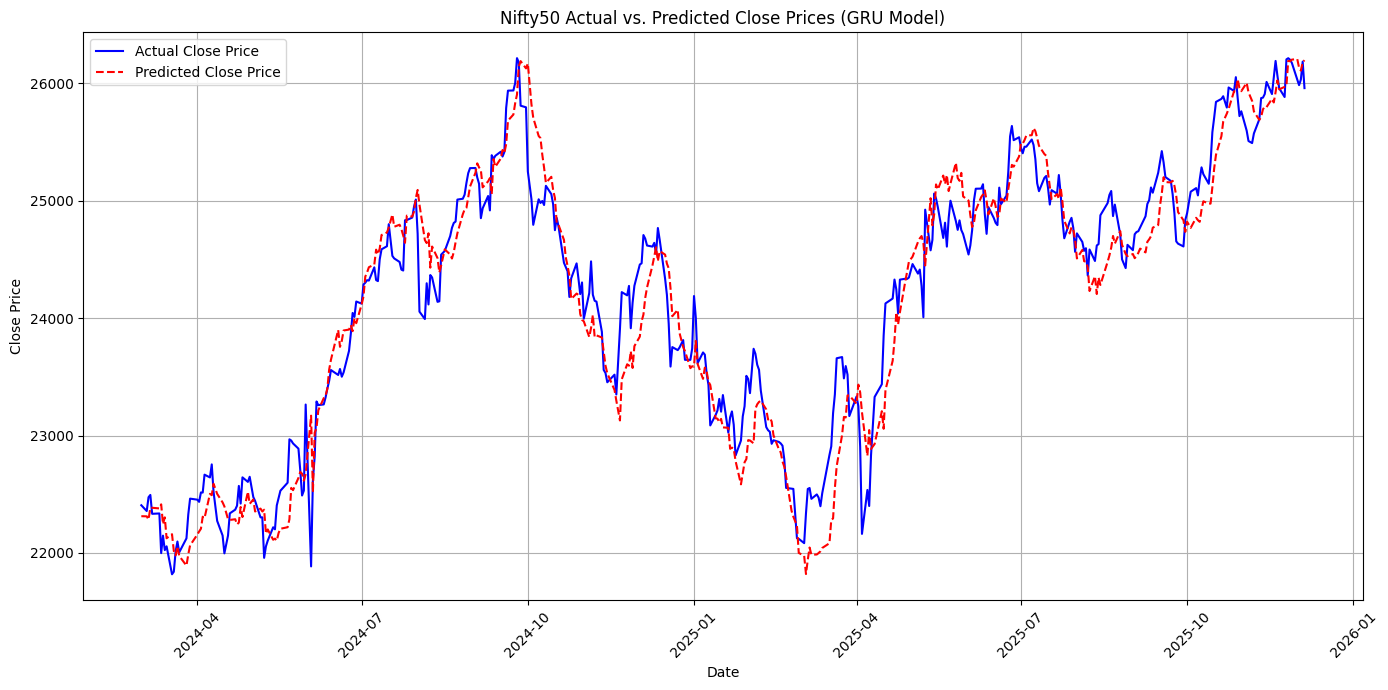

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for actual vs. predicted values
results_df = pd.DataFrame({
    'Actual_Close': y_test,
    'Predicted_Close': gru_predictions.flatten()
}, index=y_test.index)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(results_df.index, results_df['Actual_Close'], label='Actual Close Price', color='blue')
plt.plot(results_df.index, results_df['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--')
plt.title('Nifty50 Actual vs. Predicted Close Prices (GRU Model)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()